In [36]:
import numpy as np
import neurolab as nl
import numpy.random as rand
import matplotlib.pyplot as plt

In [37]:
# random predefined centers for 4 clusters
centr = np.array([[0.2, 0.2], [0.4, 0.4], [0.7, 0.3], [0.2, 0.5]])
rand_norm = 0.05 * rand.randn(100, 4, 2)

# creating training data
inp = np.array([centr + r for r in rand_norm])
inp.shape = (100 * 4, 2)
rand.shuffle(inp) 

In [40]:
# Create net with 2 inputs and 4 neurons - 1 for each cluster
net = nl.net.newc([[-1.0, 1.0],[-1.0, 1.0]], 4)
# train with rule: Winner Take All algoritm (CWTA)
error = nl.train.train_cwta(net,inp, epochs=1000, goal=0.01, show=None)

Plotting training error ..


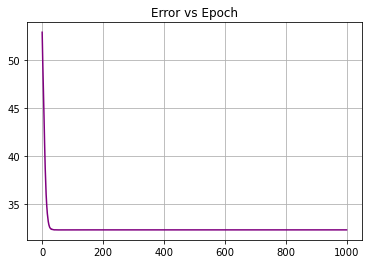

In [44]:
# Display the error reduction
fig0, ax0 = plt.subplots()
ax0.plot(error,color="purple")
ax0.grid()
ax0.set_title("Error vs Epoch")
print("Plotting training error ..")
plt.show()

Plotting the centers mapped by the KSOM network..


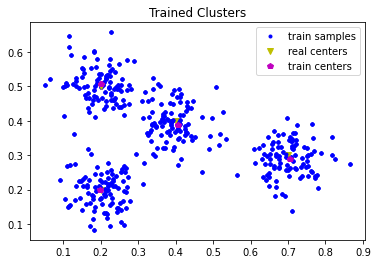

In [45]:
w = net.layers[0].np['w']
fig2, ax2 = plt.subplots()
ax2.set_title('Trained Clusters')
for j in range(len(centr)):
    x = centr + net.errorf(centr,w[j])
    ax2.plot(inp[:,0], inp[:,1], 'b.', \
             centr[j][0],centr[j][1], 'yv', \
             w[:,0], w[:,1], 'mp')
ax2.legend(['train samples', 'real centers', 'train centers'])
#ax2.legend()

print("Plotting the centers mapped by the KSOM network..")
plt.show()